In [1]:
import numpy as np
import matplotlib.pyplot as plt

NER_Chewie = np.load('./data_NER/Fig5/NER_Chewie.npz')
Cebra_Chewie = np.load('./data_NER/Fig5/Cebra_Chewie.npz')
piVAE_Chewie = np.load('./data_NER/Fig5/piVAE_Chewie.npz')

NER_Chewie_kNN = np.load('./data_NER/Fig5/NER_Chewie_kNN.npz')
Cebra_16D_Chewie_kNN = np.load('./data_NER/Fig5/Cebra_16D_Chewie_kNN.npz')
piVAE_Chewie_kNN = np.load('./data_NER/Fig5/piVAE_Chewie_kNN.npz')

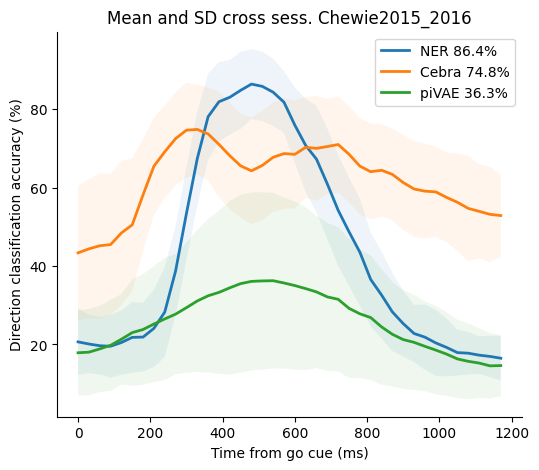

In [2]:
dur = 40
time_resolution = 30
time_bins = np.arange(0, dur * time_resolution, time_resolution)
global_min = 0
global_max = 1
matrix_C = 'viridis'

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
mean_values = np.mean(NER_Chewie['acc_time_2D'], axis=1)
sem_values = np.std(NER_Chewie['acc_time_2D'], axis=1) / 1 # np.sqrt(NER_Multi['acc_time_2D'].shape[1])
peak = np.round(np.max(mean_values), 1)
plt.plot(time_bins, mean_values, linewidth=2, label='NER '+str(peak)+'%')
plt.fill_between(time_bins, mean_values - sem_values, mean_values + sem_values, alpha=0.075)
mean_values = np.mean(Cebra_Chewie['acc_time_2D'], axis=1)
sem_values = np.std(Cebra_Chewie['acc_time_2D'], axis=1) / 1 # np.sqrt(Cebra_Multi['acc_time_2D'].shape[1])
peak = np.round(np.max(mean_values), 1)
plt.plot(time_bins, mean_values, linewidth=2, label='Cebra '+str(peak)+'%')
plt.fill_between(time_bins, mean_values - sem_values, mean_values + sem_values, alpha=0.075)
mean_values = np.mean(piVAE_Chewie['acc_time_2D'], axis=1)
sem_values = np.std(piVAE_Chewie['acc_time_2D'], axis=1) / 1 # np.sqrt(piVAE_Multi['acc_time_2D'].shape[1])
peak = np.round(np.max(mean_values), 1)
plt.plot(time_bins, mean_values, linewidth=2, label='piVAE '+str(peak)+'%')
plt.fill_between(time_bins, mean_values - sem_values, mean_values + sem_values, alpha=0.075)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Time from go cue (ms)')
plt.ylabel('Direction classification accuracy (%)')
plt.title('Mean and SD cross sess. Chewie2015_2016')
plt.legend()
plt.grid(False)
plt.savefig('./NER_Figs_pdf/Fig5/Chewie2015_2016_accuracy.pdf')

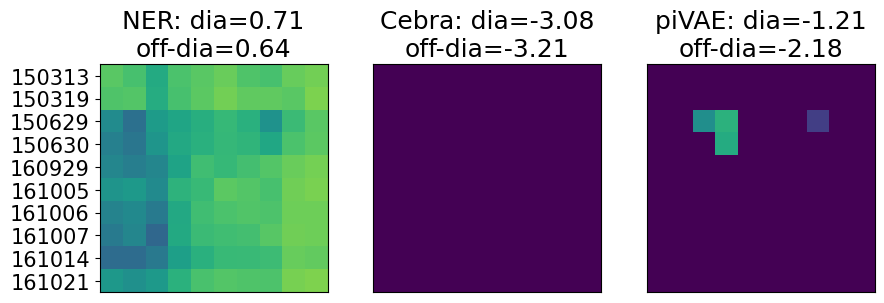

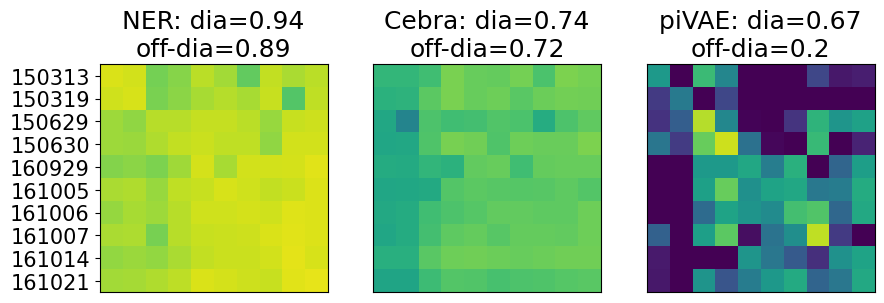

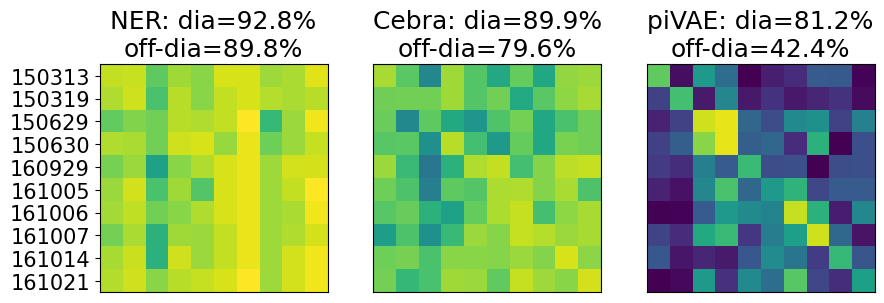

In [3]:
############ Linear & Logistic regression for Fig4a-c-e ######################
plt.rcParams.update({'font.size': 15, 'font.family': 'DejaVu Sans'})
cbar_size = 8

labels=np.unique(NER_Chewie['date_subjects'])
n_file = NER_Chewie['pos_R_2D'].shape[0]


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
vel_linear_dig=np.zeros((n_file,3))
vel_linear_offdig=np.zeros((n_file*n_file-n_file,3))
Mat_temp = NER_Chewie['vel_R_2D']
# print('NER vel performance>>>', Mat_temp)
# print('NER vel minimum>>>', np.min(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_linear_dig[:, 0] = diagonal_values*1
vel_linear_offdig[:, 0] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('NER: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(132)
Mat_temp = Cebra_Chewie['vel_R_2D']
# print('Cebra vel performance>>>', Mat_temp)
# print('Cebra vel minimum>>>', np.max(Mat_temp))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_linear_dig[:, 1] = diagonal_values*1
vel_linear_offdig[:, 1] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('Cebra: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie['vel_R_2D']
# print('piVAE vel performance>>>', Mat_temp)
# print('piVAE vel minimum>>>', np.max(Mat_temp))
# print(np.where(Mat_temp>0))
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_linear_dig[:, 2] = diagonal_values*1
vel_linear_offdig[:, 2] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('piVAE: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_vel_matirx.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
pos_linear_dig=np.zeros((n_file,3))
pos_linear_offdig=np.zeros((n_file*n_file-n_file,3))
Mat_temp = NER_Chewie['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_linear_dig[:, 0] = diagonal_values*1
pos_linear_offdig[:, 0] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('NER: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(132)
Mat_temp = Cebra_Chewie['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_linear_dig[:, 1] = diagonal_values*1
pos_linear_offdig[:, 1] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Cebra: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_linear_dig[:, 2] = diagonal_values*1
pos_linear_offdig[:, 2] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('piVAE: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_pos_matirx.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
peak_acc_linear_dig=np.zeros((n_file,3))
peak_acc_linear_offdig=np.zeros((n_file*n_file-n_file,3))
acc_min, acc_max = 20, 100
Mat_temp = NER_Chewie['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_linear_dig[:, 0] = diagonal_values
peak_acc_linear_offdig[:, 0] = non_diagonal_values
dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('NER: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
ax = plt.subplot(132)
Mat_temp = Cebra_Chewie['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_linear_dig[:, 1] = diagonal_values
peak_acc_linear_offdig[:, 1] = non_diagonal_values

dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('Cebra: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_linear_dig[:, 2] = diagonal_values
peak_acc_linear_offdig[:, 2] = non_diagonal_values

dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
ax.set_xticks([])
ax.set_yticks([])
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_title('piVAE: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_acc_matirx.pdf', bbox_inches='tight')

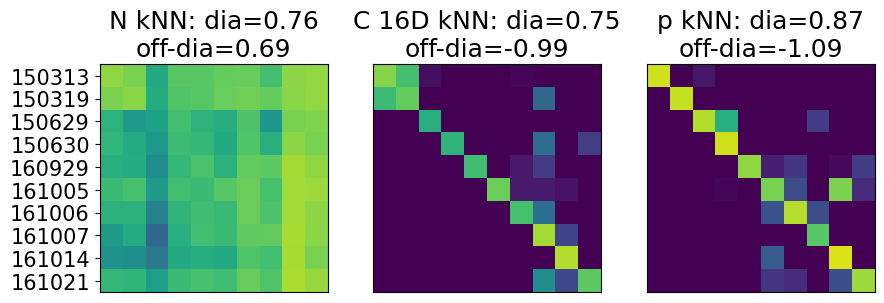

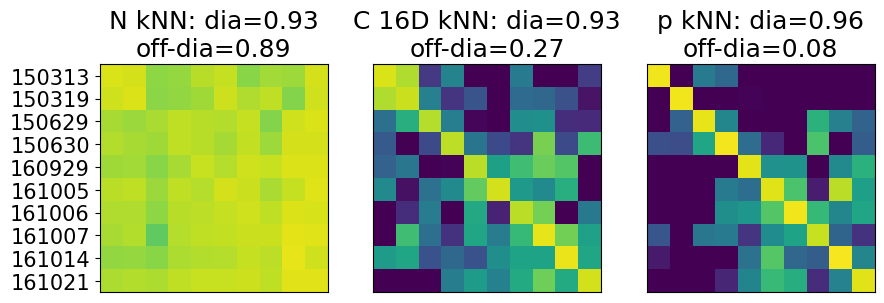

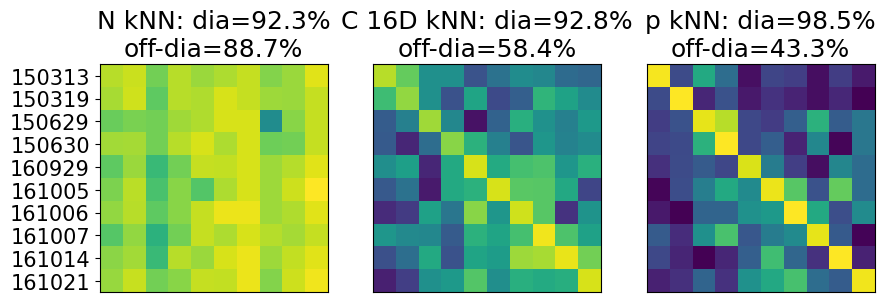

In [4]:
############ kNN for Fig4b-d-f ######################

labels=np.unique(NER_Chewie_kNN['date_subjects'])
n_file = NER_Chewie_kNN['pos_R_2D'].shape[0]

fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
vel_kNN_dig=np.zeros((n_file,3))
vel_kNN_offdig=np.zeros((n_file*n_file-n_file,3))
Mat_temp = NER_Chewie_kNN['vel_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_kNN_dig[:, 0] = diagonal_values*1
vel_kNN_offdig[:, 0] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('N kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(132)
Mat_temp = Cebra_16D_Chewie_kNN['vel_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_kNN_dig[:, 1] = diagonal_values*1
vel_kNN_offdig[:, 1] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('C 16D kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie_kNN['vel_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
vel_kNN_dig[:, 2] = diagonal_values*1
vel_kNN_offdig[:, 2] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('p kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_vel_matirx_kNN.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
pos_kNN_dig=np.zeros((n_file,3))
pos_kNN_offdig=np.zeros((n_file*n_file-n_file,3))
Mat_temp = NER_Chewie_kNN['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_kNN_dig[:, 0] = diagonal_values*1
pos_kNN_offdig[:, 0] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('N kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(132)
Mat_temp = Cebra_16D_Chewie_kNN['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_kNN_dig[:, 1] = diagonal_values*1
pos_kNN_offdig[:, 1] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('C 16D kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie_kNN['pos_R_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
              vmin=global_min, vmax=global_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
pos_kNN_dig[:, 2] = diagonal_values*1
pos_kNN_offdig[:, 2] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 2)
non_dia = np.round(np.mean(non_diagonal_values)*1, 2)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('p kNN: dia='+str(dia)+'\n'+'off-dia='+str(non_dia))
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_pos_matirx_kNN.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(131)
acc_min, acc_max = 20, 100
peak_acc_kNN_dig=np.zeros((n_file,3))
peak_acc_kNN_offdig=np.zeros((n_file*n_file-n_file,3))
Mat_temp = NER_Chewie_kNN['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_kNN_dig[:, 0] = diagonal_values*1
peak_acc_kNN_offdig[:, 0] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
plt.yticks(ticks=np.arange(n_file), labels=labels)
ax.set_title('N kNN: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
ax = plt.subplot(132)
Mat_temp = Cebra_16D_Chewie_kNN['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_kNN_dig[:, 1] = diagonal_values*1
peak_acc_kNN_offdig[:, 1] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('C 16D kNN: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
ax = plt.subplot(133)
Mat_temp = piVAE_Chewie_kNN['peak_acc_2D']
im = ax.imshow(Mat_temp, cmap=matrix_C, interpolation='none', aspect='equal',
               vmin=acc_min, vmax=acc_max)
diagonal_values = np.diag(Mat_temp)
non_diagonal_values = Mat_temp[~np.eye(n_file, dtype=bool)]
peak_acc_kNN_dig[:, 2] = diagonal_values*1
peak_acc_kNN_offdig[:, 2] = non_diagonal_values*1
dia = np.round(np.mean(diagonal_values)*1, 1)
non_dia = np.round(np.mean(non_diagonal_values)*1, 1)
# cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# cbar.ax.tick_params(labelsize=cbar_size)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('p kNN: dia='+str(dia)+'%\n'+'off-dia='+str(non_dia)+'%')
plt.savefig('./NER_Figs_pdf/Fig5/Chewie_2015_2016_acc_matirx_kNN.pdf', bbox_inches='tight')

In [5]:
# Extract the upper triangular part, excluding the diagonal
def NER_Cebra_piVAE_compare(results_vector):
    import numpy as np
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from statsmodels.stats.anova import AnovaRM
    
#     return matrix[np.triu_indices_from(matrix, k=1)]

    corr_NER = results_vector[:, 0]
    corr_Cebra = results_vector[:, 1]
    corr_piVAE = results_vector[:, 2]
    
    if np.max(np.abs(np.mean(corr_NER)))>1:
        # Print the mean and standard deviation of 45 values in corr matrix
        print(f"NER mean: {np.mean(corr_NER):.0f}, SD: {np.std(corr_NER):.2f}")
        print(f"Cebra mean: {np.mean(corr_Cebra):.0f}, SD: {np.std(corr_Cebra):.2f}")
        print(f"piVAE mean: {np.mean(corr_piVAE):.0f}, SD: {np.std(corr_piVAE):.2f}")
    else:
        print(f"NER mean: {np.mean(corr_NER):.2f}, SD: {np.std(corr_NER):.2f}")
        print(f"Cebra mean: {np.mean(corr_Cebra):.2f}, SD: {np.std(corr_Cebra):.2f}")
        print(f"piVAE mean: {np.mean(corr_piVAE):.2f}, SD: {np.std(corr_piVAE):.2f}")

    # Perform paired t-tests
    t_stat_NER_Cebra, p_value_NER_Cebra = stats.ttest_rel(corr_NER, corr_Cebra)
    t_stat_NER_piVAE, p_value_NER_piVAE = stats.ttest_rel(corr_NER, corr_piVAE)
    t_stat_Cebra_piVAE, p_value_Cebra_piVAE = stats.ttest_rel(corr_Cebra, corr_piVAE)

    # Print the results
    print(f"NER vs. Cebra: t-statistic = {t_stat_NER_Cebra:.1f}, p-value = {p_value_NER_Cebra:.1e}")
    print(f"NER vs. piVAE: t-statistic = {t_stat_NER_piVAE:.1f}, p-value = {p_value_NER_piVAE:.1e}")
    print(f"Cebra vs. piVAE: t-statistic = {t_stat_Cebra_piVAE:.1f}, p-value = {p_value_Cebra_piVAE:.1e}")

    # Combine the data into a DataFrame for repeated measures ANOVA
    data = {
        'NER': corr_NER,
        'Cebra': corr_Cebra,
        'piVAE': corr_piVAE
    }
    df = pd.DataFrame(data)
    # Add a 'Subject' column to identify each unique pair (correlation value)
    df['Subject'] = np.arange(len(corr_NER))

    # Reshape the DataFrame for ANOVA
    df_melt = df.melt(id_vars=['Subject'], var_name='Condition', value_name='Correlation')

    # Perform Repeated Measures ANOVA with aggregation function
    aovrm = AnovaRM(df_melt, 'Correlation', 'Subject', within=['Condition'], aggregate_func=np.mean)
    res = aovrm.fit()
    # Extracting the precise F-value
    F_value = res.anova_table['F Value'][0]
    # Extracting the precise p-value
    p_value = res.anova_table['Pr > F'][0]

    # Print the precise p-value in scientific notation
    print(f"Anova: F value: {F_value:.1f}, p-value: {p_value:.1e}")

    # Perform Friedman Test
    friedman_test = stats.friedmanchisquare(corr_NER, corr_Cebra, corr_piVAE)
    print(f"Friedman test: statistic = {friedman_test.statistic:.1f}, p-value = {friedman_test.pvalue:.1e}")

In [6]:
NER_Cebra_piVAE_compare(vel_linear_dig)
NER_Cebra_piVAE_compare(vel_linear_offdig)
print('')
NER_Cebra_piVAE_compare(vel_kNN_dig)
NER_Cebra_piVAE_compare(vel_kNN_offdig)
print('')
NER_Cebra_piVAE_compare(pos_linear_dig)
NER_Cebra_piVAE_compare(pos_linear_offdig)
print('')
NER_Cebra_piVAE_compare(pos_kNN_dig)
NER_Cebra_piVAE_compare(pos_kNN_offdig)
# NER_Cebra_piVAE_compare(peak_acc_linear_dig)
# NER_Cebra_piVAE_compare(peak_acc_linear_offdig)
# NER_Cebra_piVAE_compare(peak_acc_kNN_dig)
# NER_Cebra_piVAE_compare(peak_acc_kNN_offdig)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


NER mean: 0.71, SD: 0.07
Cebra mean: -3.08, SD: 0.65
piVAE mean: -1.21, SD: 1.35
NER vs. Cebra: t-statistic = 16.8, p-value = 4.3e-08
NER vs. piVAE: t-statistic = 4.1, p-value = 2.5e-03
Cebra vs. piVAE: t-statistic = -5.8, p-value = 2.8e-04
Anova: F value: 57.9, p-value: 1.4e-08
Friedman test: statistic = 18.2, p-value = 1.1e-04
NER mean: 0.64, SD: 0.13
Cebra mean: -3.21, SD: 0.96
piVAE mean: -2.18, SD: 1.63
NER vs. Cebra: t-statistic = 40.9, p-value = 1.9e-59
NER vs. piVAE: t-statistic = 16.7, p-value = 3.3e-29
Cebra vs. piVAE: t-statistic = -7.8, p-value = 1.2e-11
Anova: F value: 434.5, p-value: 3.3e-69
Friedman test: statistic = 146.5, p-value = 1.6e-32

NER mean: 0.76, SD: 0.09
Cebra mean: 0.75, SD: 0.08
piVAE mean: 0.87, SD: 0.06
NER vs. Cebra: t-statistic = 0.4, p-value = 7.0e-01
NER vs. piVAE: t-statistic = -3.5, p-value = 7.2e-03
Cebra vs. piVAE: t-statistic = -3.2, p-value = 1.1e-02
Anova: F value: 9.5, p-value: 1.5e-03
Friedman test: statistic = 9.8, p-value = 7.4e-03
NER mea